## Step 1: Import required libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Step 2: Load and read the data

In [55]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")

red_wine['quality'] = red_wine["quality"].astype(float)

display(red_wine.head())
display(red_wine.shape)

red_wine.columns
    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


(1599, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Step 3: Split the training and testing data  

In [56]:
red_wine = pd.read_csv("winequality-white.csv", sep=";")
red_wine['quality'] = red_wine["quality"].astype(float)
bins = [0, 5.5, 7.5, 10]

# wine quality : 0 : low, 1 : medium, 2 : high
labels = [0, 1, 2] 
red_wine['quality'] = pd.cut(red_wine['quality'], bins=bins, labels=labels)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [57]:
X = red_wine.drop(['quality'], axis=1)
y = red_wine['quality']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


## Step 4-1: Find the optimal model 

#### Logistic Regression(71%)

In [59]:
log = LogisticRegression()
log.fit(X_train, y_train.ravel())
y_pred_tr = log.predict(X_train)
y_pred_test = log.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(log, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())



              precision    recall  f1-score   support

           0       0.66      0.49      0.56       321
           1       0.73      0.87      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.71       980
   macro avg       0.46      0.45      0.45       980
weighted avg       0.68      0.71      0.69       980

Cross-Validation Scores: [0.7002551  0.7130102  0.7372449  0.72158365 0.71775223]
Average Accuracy: 0.7179692183386764


#### K Nearest Neighbors(72%)

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_tr = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

Cross-Validation Scores: [0.72959184 0.72321429 0.7372449  0.71392082 0.72158365]
Average Accuracy: 0.7251110980790785


#### SVM(74%)

In [61]:
svc_lin = SVC()
svc_lin.fit(X_train, y_train)
y_pred_tr = svc_lin.predict(X_train)
y_pred_test = svc_lin.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(svc_lin, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       321
           1       0.76      0.87      0.81       624
           2       0.00      0.00      0.00        35

    accuracy                           0.74       980
   macro avg       0.48      0.48      0.48       980
weighted avg       0.71      0.74      0.72       980

Cross-Validation Scores: [0.73469388 0.74107143 0.7627551  0.74201788 0.74968072]
Average Accuracy: 0.7460438006620272


#### Gaussian(66%)

In [62]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred_tr = gauss.predict(X_train)
y_pred_test = gauss.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(gauss, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       321
           1       0.74      0.75      0.74       624
           2       0.18      0.09      0.12        35

    accuracy                           0.67       980
   macro avg       0.49      0.47      0.47       980
weighted avg       0.66      0.67      0.66       980

Cross-Validation Scores: [0.66836735 0.63265306 0.67857143 0.67305236 0.66028097]
Average Accuracy: 0.6625850340136055


#### Decision Tree(71%)

In [63]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train.ravel())
y_pred_tr = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(tree, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       321
           1       0.74      0.81      0.77       624
           2       0.00      0.00      0.00        35

    accuracy                           0.70       980
   macro avg       0.45      0.46      0.45       980
weighted avg       0.67      0.70      0.68       980

Cross-Validation Scores: [0.72576531 0.69515306 0.72704082 0.73052363 0.69348659]
Average Accuracy: 0.714393880157427


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

#### Random Forest(80%) 

In [64]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train.ravel())
y_pred_tr = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(forest, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       321
           1       0.85      0.89      0.87       624
           2       0.94      0.43      0.59        35

    accuracy                           0.83       980
   macro avg       0.86      0.69      0.74       980
weighted avg       0.83      0.83      0.82       980

Cross-Validation Scores: [0.80357143 0.81632653 0.80357143 0.79948914 0.80842912]
Average Accuracy: 0.8062775301691557


#### XGB classifier(79%)

In [65]:
xgvc = XGBClassifier()
xgvc.fit(X_train, y_train.ravel())
y_pred_tr = xgvc.predict(X_train)
y_pred_test = xgvc.predict(X_test)
print(classification_report(y_test, y_pred_test))

cross_val_scores = cross_val_score(xgvc, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores :", cross_val_scores)
print("Average Accuracy :", cross_val_scores.mean())



              precision    recall  f1-score   support

           0       0.78      0.72      0.75       321
           1       0.84      0.89      0.86       624
           2       0.80      0.46      0.58        35

    accuracy                           0.82       980
   macro avg       0.81      0.69      0.73       980
weighted avg       0.82      0.82      0.81       980

Cross-Validation Scores : [0.80229592 0.81377551 0.79719388 0.78799489 0.7816092 ]
Average Accuracy : 0.796573878593583


## Step 4-2: Compare the models with visualization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

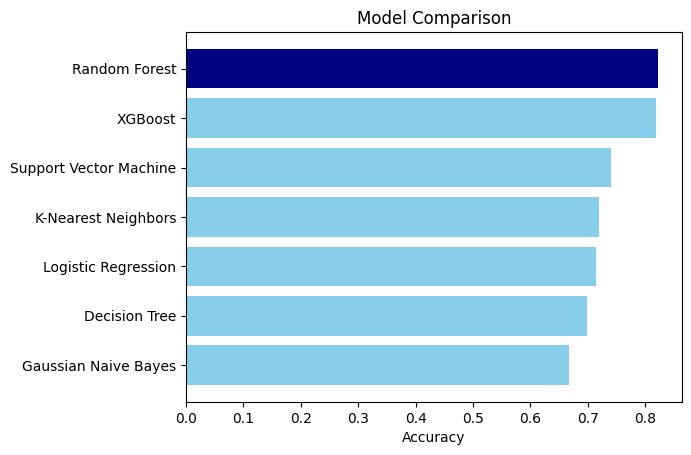

In [66]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

models = [('Logistic Regression', LogisticRegression()),
          ('K-Nearest Neighbors', KNeighborsClassifier()),
          ('Support Vector Machine', SVC()),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier(max_depth=2)),
          ('Random Forest', RandomForestClassifier()),
          ('XGBoost', XGBClassifier())]

results = []

for name, model in models:
    model.fit(X_train, y_train.ravel())
    y_pred_test = model.predict(X_test)
    report = classification_report(y_test, y_pred_test, output_dict=True)
    results.append({'Model': name, 'Accuracy': report['accuracy'], 'Precision': report['weighted avg']['precision'], 'Recall': report['weighted avg']['recall'], 'F1 Score': report['weighted avg']['f1-score']})

results.sort(key=lambda x: x['Accuracy'], reverse=False)

best_model = results[6]

model_names = [result['Model'] for result in results]
accuracies = [result['Accuracy'] for result in results]

colors = ['skyblue' if model != best_model['Model'] else 'navy' for model in model_names]

plt.barh(model_names, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Comparison')

plt.show()

## Step 5: Optimize the Random Forest model 

In [68]:
forest = RandomForestClassifier()

param_dist = {'n_estimators': [100, 200, 300, 400, 500], 
              'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 4, 8, 16]}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train.ravel())

best_params = grid_search.best_params_
print("The best parameter:", best_params)

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("The best model result:")
print(classification_report(y_test, y_pred_test))

scores = cross_val_score(best_model, X_train, y_train.ravel(), cv=5, scoring='accuracy')
mean_accuracy = scores.mean()
print("Cross-Validation Mean Accuracy:", mean_accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=5, n_e

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       321
           1       0.74      0.85      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.71       980
   macro avg       0.46      0.46      0.45       980
weighted avg       0.68      0.71      0.69       980

Cross-Validation Mean Accuracy: 0.7373657700628143


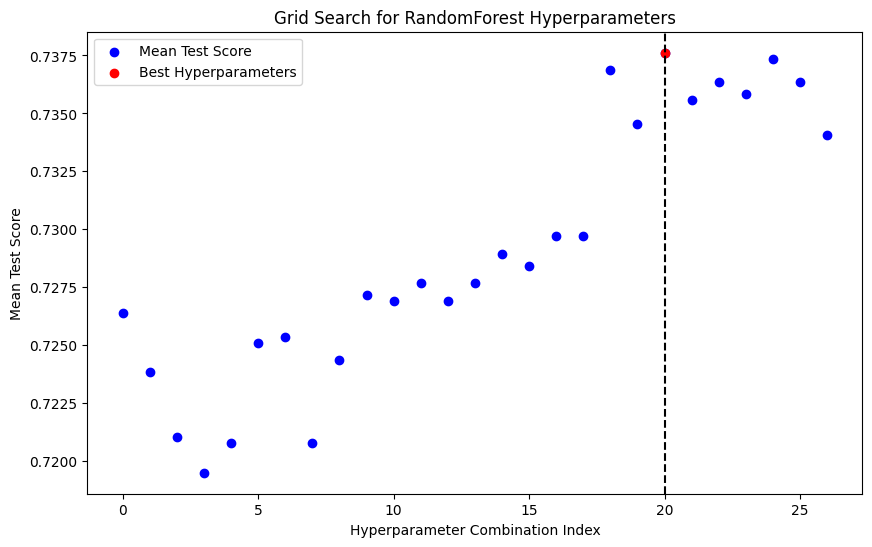

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5}


In [71]:
results = grid_search.cv_results_
param_grid = grid_search.param_grid

df = pd.DataFrame.from_dict(results)
df = df[['param_n_estimators', 'param_max_depth', 'mean_test_score']]

best_idx = df['mean_test_score'].idxmax()
best_params = {
    'n_estimators': df['param_n_estimators'][best_idx],
    'max_depth': df['param_max_depth'][best_idx],
}

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['mean_test_score'], c='b', label='Mean Test Score')
plt.scatter(best_idx, df['mean_test_score'][best_idx], c='r', label='Best Hyperparameters')
plt.axvline(x=best_idx, color='k', linestyle='--')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Grid Search for RandomForest Hyperparameters')
plt.legend()
plt.show()

print("Best Hyperparameters:", best_params)

## Step 6: Do the same with white wine dataset

In [73]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")
white_wine['quality'] = white_wine["quality"].astype(float)


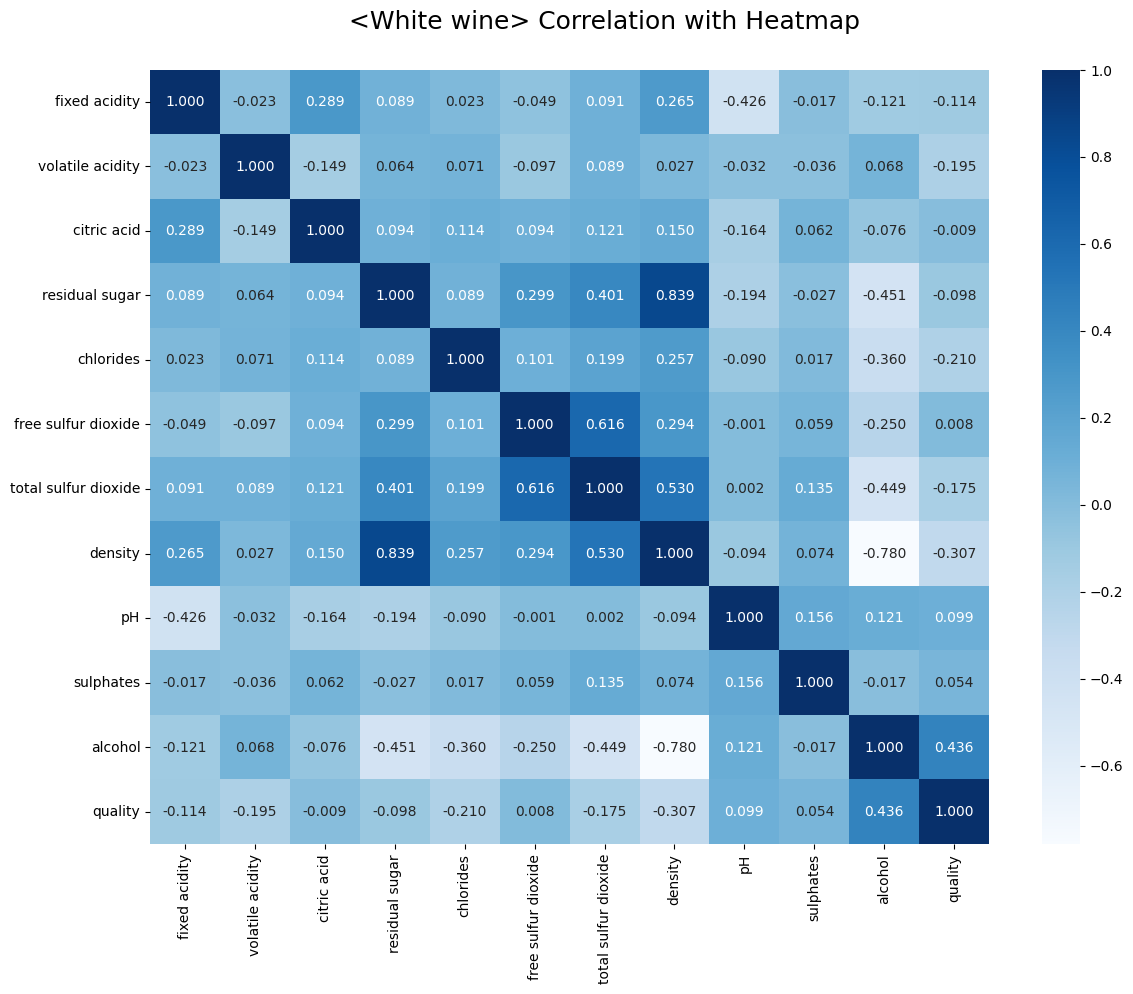

In [74]:
correlation = white_wine.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap="Blues", annot=True, fmt='.3f')
plt.tight_layout(pad=0.4)
plt.suptitle("<White wine> Correlation with Heatmap", fontsize=18)
plt.subplots_adjust(top=0.92)

In [75]:
# So I'm going to remove 'density' (Density is generally used as a measure of the conversion of sugar to alcohol. So resiual sugar has more importance on this project)

white_wine_new = white_wine.drop(['density'], axis=1)
white_wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6.0


In [76]:
bins = [0, 5.5, 7.5, 10]
labels = [0, 1, 2] 
white_wine_new['quality'] = pd.cut(white_wine_new['quality'], bins=bins, labels=labels)
white_wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,1


In [77]:
X = white_wine_new.drop(['quality'], axis=1)
y = white_wine_new['quality']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

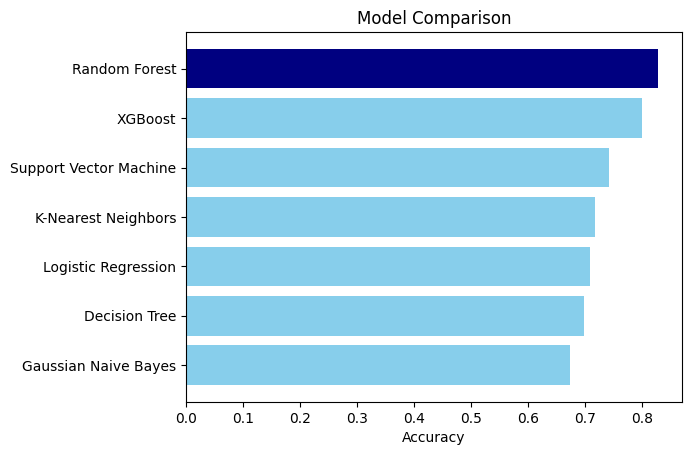

In [79]:
models = [('Logistic Regression', LogisticRegression()),
          ('K-Nearest Neighbors', KNeighborsClassifier()),
          ('Support Vector Machine', SVC()),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier(max_depth=2)),
          ('Random Forest', RandomForestClassifier()),
          ('XGBoost', XGBClassifier())]

results = []

for name, model in models:
    model.fit(X_train, y_train.ravel())
    y_pred_test = model.predict(X_test)
    report = classification_report(y_test, y_pred_test, output_dict=True)
    results.append({'Model': name, 'Accuracy': report['accuracy'], 'Precision': report['weighted avg']['precision'], 'Recall': report['weighted avg']['recall'], 'F1 Score': report['weighted avg']['f1-score']})

results.sort(key=lambda x: x['Accuracy'], reverse=False)

best_model = results[6]

model_names = [result['Model'] for result in results]
accuracies = [result['Accuracy'] for result in results]

colors = ['skyblue' if model != best_model['Model'] else 'navy' for model in model_names]

plt.barh(model_names, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Model Comparison')

plt.show()


In [81]:

forest = RandomForestClassifier()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.ravel())


best_params = grid_search.best_params_
print("The best parameters:", best_params)


best_model = grid_search.best_estimator_

cross_val_scores = cross_val_score(best_model, X_train, y_train.ravel(), cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END m

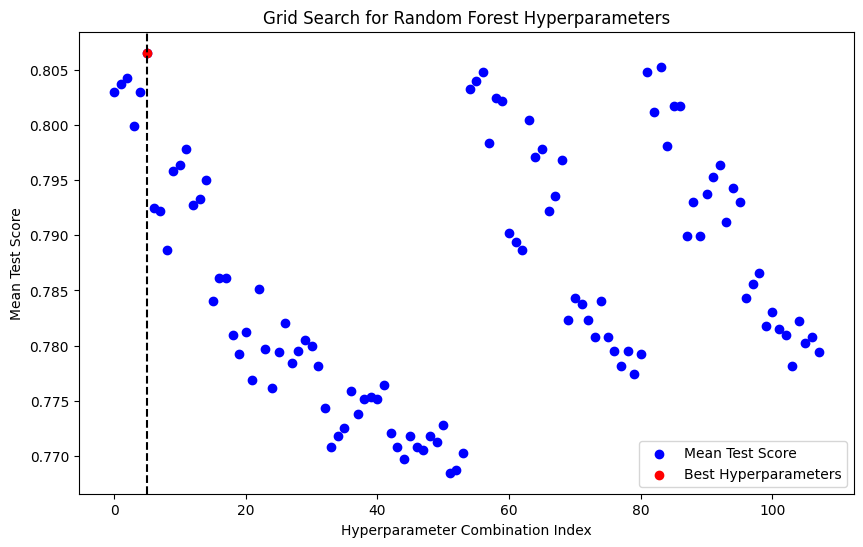

Best Hyperparameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1}


In [82]:
results = grid_search.cv_results_
param_grid = grid_search.param_grid

df = pd.DataFrame.from_dict(results)
df = df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

best_idx = df['mean_test_score'].idxmax()
best_params = {
    'n_estimators': df['param_n_estimators'][best_idx],
    'max_depth': df['param_max_depth'][best_idx],
    'min_samples_split': df['param_min_samples_split'][best_idx],
    'min_samples_leaf': df['param_min_samples_leaf'][best_idx]
}

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['mean_test_score'], c='b', label='Mean Test Score')
plt.scatter(best_idx, df['mean_test_score'][best_idx], c='r', label='Best Hyperparameters')
plt.axvline(x=best_idx, color='k', linestyle='--')
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Grid Search for Random Forest Hyperparameters')
plt.legend()
plt.show()

print("Best Hyperparameters:", best_params)